In [1]:
import xarray as xr
from evaluations.confusion_table import  compute_score, plot_confusion_table, compute_all_scores
import matplotlib.pyplot as plt
from evaluations.uncertainty import histograms_to_biais_rmse
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)

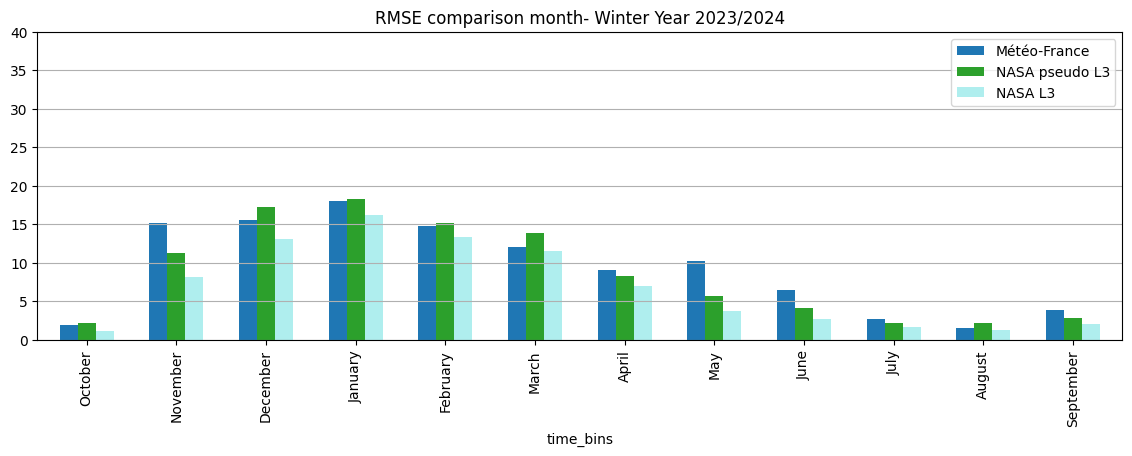

In [ ]:
from evaluations.statistics_base import EvaluationVsHighResBase

from winter_year import WinterYear
from products.plot_settings import METEOFRANCE_VAR_NAME, NASA_PSEUDO_L3_VAR_NAME, NASA_L3_VAR_NAME 
from evaluations.uncertainty import rmse_barplots, postprocess_uncertainty_analysis 

analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}
#biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(WinterYear(2023,2024))}), analysis_var_plot_name='Month')
rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(WinterYear(2023,2024))}), analysis_var_plot_name='month')

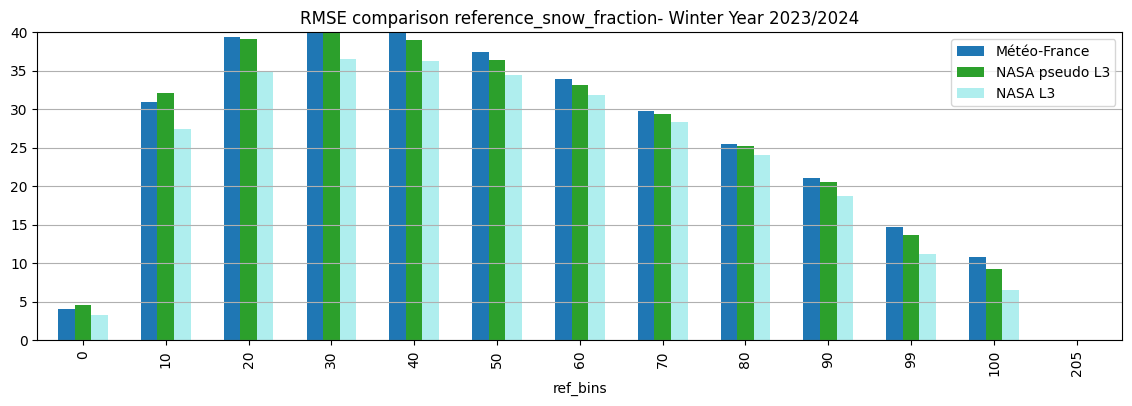

In [ ]:
rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var='ref_bins'), analysis_var_plot_name='reference snow fraction')

In [2]:
import matplotlib.axes
import numpy as np
import matplotlib
def histograms_to_boxplot(metrics_ds : xr.Dataset, ax: matplotlib.axes.Axes):

    # def repeat_fun(metrics_ds):
    #     return np.repeat(metrics_ds['biais_bins'], repeats=metrics_ds['n_occurrences'])
    all_dims = list(metrics_ds.sizes.keys())
    all_dims.remove('biais_bins')
    metrics_squeezed = metrics_ds.sum(dim=all_dims)
    #data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    return xr.Dataset(ax.boxplot(data_to_plot,widths=3, positions=[metrics_ds.coords['sensor_zenith_bins'].values[0]]))


/home/imperatoren/miniconda3/envs/viirs_env/lib/python3.12/site-packages/xarray/core/indexes.py:822: RuntimeWarning: '<' not supported between instances of 'Line2D' and 'Line2D', sort order is undefined for incomparable objects.
  index = self.index.union(other.index)


<xarray.Dataset> Size: 512B
Dimensions:             (whiskers: 16, caps: 16, boxes: 8, medians: 8,
                         fliers: 8, means: 0, sensor_zenith_bins: 8)
Coordinates:
  * whiskers            (whiskers) object 128B Line2D(_nolegend_) ... Line2D(...
  * caps                (caps) object 128B Line2D(_nolegend_) ... Line2D(_nol...
  * boxes               (boxes) object 64B Line2D(_child0) ... Line2D(_child49)
  * medians             (medians) object 64B Line2D(_nolegend_) ... Line2D(_n...
  * fliers              (fliers) object 64B Line2D(_nolegend_) ... Line2D(_no...
  * means               (means) float64 0B 
  * sensor_zenith_bins  (sensor_zenith_bins) int64 64B 10 20 30 40 50 60 70 80
Data variables:
    *empty*

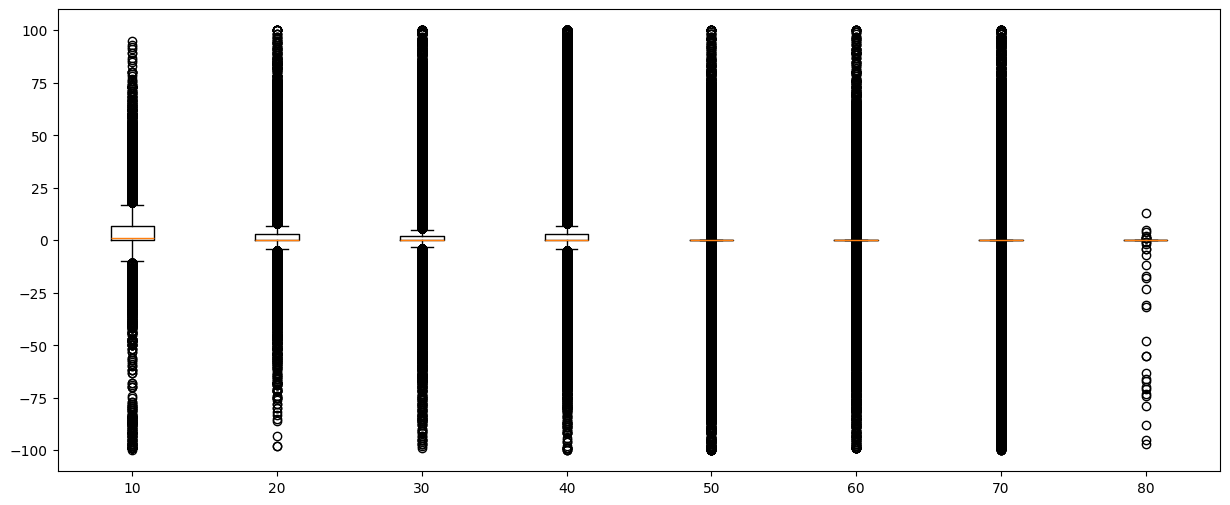

In [3]:
fig, ax = plt.subplots(figsize=(15,6))
mf_metrics_ds.isel(sensor_zenith_bins=slice(None, -1)).groupby('sensor_zenith_bins').map(histograms_to_boxplot, ax = ax)